## Исследование данных о российском кинопрокате



Нам нужно изучить рынок российского кинопроката и выявить текущие тренды. Необходимо уделить внимание фильмам, которые получили государственную поддержку. Попробуем ответить на вопрос, насколько такие фильмы интересны зрителю. 
Мы будем работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.  

План работы:  

Шаг 1. Откроем файлы с данными и объединим их в один датафрейм

Шаг 2. Предобработка данных  

Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.  
Изучим пропуски в датафрейме.  
Проверим, есть ли в данных дубликаты. 
Изучите столбцы, которые содержат категориальные значения.  
Изучите столбцы, которые хранят количественные значения.  
Добавим новые столбцы:  
С информацией о годе проката. 
С именем и фамилией главного режиссёра  
С основным жанром фильма.  
С расчетом, какую долю от общего бюджета фильма составляет государственная поддержка.  

Шаг 3. Проведим исследовательский анализ данных  

Посмотрим, сколько фильмов выходило в прокат каждый год.  
Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.  
Проанализируем, как эта доля менялась по годам.  
Сделаем вывод о том, какой период полнее всего представлен в данных.  
Изучим, как менялась динамика проката по годам.  
Посчитаем среднюю и медианную сумму сборов для каждого года.  
Ответим на следующие вопросы:
    - влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?  
    - Фильмы с каким возрастным ограничением собрали больше всего денег в прокате?  
    - Меняется ли картина в зависимости от года?  
    
Шаг 4. Исследуем фильмы, которые получили государственную поддержку  

Поищем интересные закономерности в данных.   
Посмотрим, сколько выделяют средств на поддержку кино.   
Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.   

Шаг 5. Напишем общий вывод.  



### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" 

In [1]:
import pandas as pd

In [2]:
data1 = pd.read_csv('/datasets/mkrf_movies.csv')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [3]:
data1.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
data2 = pd.read_csv('/datasets/mkrf_shows.csv')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


In [5]:
data2['puNumber'] = data2['puNumber'].astype('str')
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   object 
 1   box_office  3158 non-null   float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [6]:
data2.head()

,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [7]:
pd.options.display.float_format = '{:20,.2f}'.format

In [8]:
data = data1.merge(data2, on='puNumber', how='outer')
data.head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия","2,700.00"
7,Любовь и сигареты,221074614,2014-12-29T12:00:00.000Z,Художественный,"Юнайтед Артистс, Грин Стрит Филмз, Айкон Интер...",США,Джон Туртурро,"Джон Пенотти, Джон Туртурро",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.6,"мюзикл,мелодрама,комедия",NaN
8,Отпетые мошенники.,121011416,2016-05-05T12:00:00.000Z,Художественный,"Пульсар Продюксьон, ТФ1 Фильм",Франция,Эрик Беснард,Патрис Леду,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,8.0,"комедия,криминал",NaN
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN


In [9]:
# Проверим, что все данные из датасета mkrf_movies вошли в получившийся датафрейм:
display(data1.shape[0])
display(data2.shape[0])
display(data.shape[0])
data1[~data1['puNumber'].isin(data['puNumber'].unique())]

7486

3158

7486

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


Описание данных  


title — название фильма  
puNumber — номер прокатного удостоверения  
show_start_date — дата премьеры фильма  
type — тип фильма  
film_studio — студия-производитель  
production_country — страна-производитель  
director — режиссёр  
producer — продюсер  
age_restriction — возрастная категория  
refundable_support — объём возвратных средств государственной поддержки  
nonrefundable_support — объём невозвратных средств государственной поддержки  
financing_source — источник государственного финансирования  
budget — общий бюджет фильма  
ratings — рейтинг фильма на КиноПоиске  
genres — жанр фильма  
puNumber — номер прокатного удостоверения  
box_office — сборы в рублях

Мы открыли предоставленные данные и объединили их в один датафрейм. Также мы сделали проверку, благодаря которой можно убедиться, что правильно выбран метод объединения, и что все строки из датафрейма mkrf_movies вошли в получившийся датафрейм.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверим типы данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [11]:
data.tail(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
7476,Я свободен,111023019,2019-12-26T12:00:00.000Z,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.9,драма,NaN
7477,Тридцать,121038419,2019-12-26T12:00:00.000Z,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.3,драма,NaN
7478,(Не)идеальный мужчина,111023119,2019-12-24T12:00:00.000Z,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,"40,000,000.00","60,000,000.00","150,147,502.00",Фонд кино,4.5,"комедия,фантастика,мелодрама",NaN
7479,Эколав,111023219,2019-12-26T12:00:00.000Z,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23T12:00:00.000Z,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"219,569.00"
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23T12:00:00.000Z,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24T12:00:00.000Z,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.4,"боевик,триллер",NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28T12:00:00.000Z,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30T12:00:00.000Z,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.3,"комедия,вестерн",NaN


In [12]:
data.loc[data['puNumber'] == 'нет', 'puNumber'] = 0
data['puNumber'] = data['puNumber'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [13]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format= '%Y-%m-%d %H:%M')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   puNumber               7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

In [14]:
data['ratings'].sort_values().unique()

array(['1.0', '1.1', '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8',
       '1.9', '19%', '2.1', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9',
       '28%', '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7',
       '3.8', '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6',
       '4.7', '4.8', '4.9', '5.0', '5.1', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.7', '5.8', '5.9', '6.0', '6.1', '6.2', '6.3', '6.4',
       '6.5', '6.6', '6.7', '6.8', '6.9', '62%', '64%', '7.0', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '79%',
       '8.0', '8.1', '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8',
       '8.9', '83%', '88%', '89%', '9.0', '9.1', '9.2', '90%', '91%',
       '94%', '97%', '98%', '99%', nan], dtype=object)

In [15]:
data['ratings'] = data['ratings'].str.strip('%').astype('float64')
data['ratings'].sort_values().unique()

array([ 1. ,  1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2.1,
        2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,
        3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,
        4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,  5.5,  5.6,
        5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,  6.6,  6.7,
        6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,  7.7,  7.8,
        7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,  8.8,  8.9,
        9. ,  9.1,  9.2, 19. , 28. , 62. , 64. , 79. , 83. , 88. , 89. ,
       90. , 91. , 94. , 97. , 98. , 99. ,  nan])

In [16]:
data.update(data[data['ratings'] >= 11]['ratings']/10)
data['ratings'].sort_values().unique()

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.4, 9.7, 9.8, 9.9, nan])

В данных обнаружены неоптимальные типы:  
- в столбце puNumber obj заменен на int  
- в столбце show_start_time obj заменен на datetime  
- в столбце ratings obj заменен на float

#### Шаг 2.2. Изучим пропуски в датафрейме

- И объясним, почему заполнили пропуски определённым образом или почему не стали этого делать.

Сделаем контроль размера датасета до обработки пропусков:

In [17]:
data_begin = data.shape[0]
data_begin

7486

In [18]:
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

In [19]:
data.loc[data['production_country'].isnull()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09 12:00:00+00:00,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия","194,527.00"
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


In [20]:
data['production_country'] = data['production_country'].fillna(value = 'Россия')
data['production_country'].isna().sum()

0

In [21]:
data.loc[data['director'].isnull()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04 12:00:00+00:00,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,"44,350.00"
1735,Помпеи. Британский музей,126003413,2013-09-11 12:00:00+00:00,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22 12:00:00+00:00,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20 12:00:00+00:00,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11 12:00:00+00:00,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25 12:00:00+00:00,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25 12:00:00+00:00,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11 12:00:00+00:00,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


In [22]:
data['director'] = data['director'].fillna(value = '')
data['director'].isna().sum()

0

In [23]:
data.loc[data['producer'].isnull()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия","2,700.00"
9,Отпуск за свой счет,111019114,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7405,Отряд специального назначения,111020419,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.00,"приключения,военный",NaN
7406,Назначаешься внучкой,111020519,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,военный,NaN
7407,Перед рассветом,111020619,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.90,"драма,мелодрама",NaN
7408,Ты помнишь,111020719,2019-12-01 12:00:00+00:00,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.00,"драма,мелодрама,военный",NaN


In [24]:
data.loc[data['ratings'].isnull()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14 12:00:00+00:00,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25 12:00:00+00:00,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28 12:00:00+00:00,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"219,569.00"
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В данных имеются пропуски в следующих столбцах:  
- film_studio  
- priduction_country  
- director  
- producer  
- refundable_support  
- nonrefundable_support  
- budget  
- financing_source  
- ratings  
- genres  
- box_office 
  
В столбце film_studio имеются пропуски, т.к. не все фильмы снимаются на студиях. Такие пропуски не являются случайными и заполнять их не нужно.  
При рассмотрении строк с пропусками в столбце production_country заметно, что значения можно заполнить, основываясь данных из соседних столбцов, что мы и сделали. Такие пропуски называются полностью случайными.  
В столбцах director, ratings и genres пропуски похожи на случайные, однако предложить логичную замену им невозможно. В столбцах rating и genres мы их оставляем, а в столбце director заменим пустой строкой. Этот столбец участвует в дальнейшем анализе, а наличие пропусков будет мешать выполнению операций.  
В столбце producer пропуски случайны и не подлежат заполнению, т.к. пропуски имеют фильмы, снятые в СССР. В СССР кинематограф финансировался только государством, продюсеров не было.  
Из описания данных следует, что в столбцах refundable_support, nonrefundable_support, budget и financing_source указан объем государственной поддержки. Если в информации о фильме есть пропуски в данных столбцах, значит государственной поддержки он не получал. Пропуски не являются случайными.  

#### Шаг 2.3. Изучим дубликаты в датафрейме
- Проверим, есть ли в данных дубликаты. Опишем причины, которые могли повлиять на появление дублей.

In [25]:
data.duplicated().sum()

0

In [26]:
#data[data[['title', 'director', 'ratings', 'box_office']].duplicated()]

In [27]:
#data = data.drop_duplicates(subset =['title', 'director', 'ratings', 'box_office'], keep = 'first').reset_index(drop = True)

In [28]:
#data[['title', 'director', 'ratings', 'box_office']].duplicated().sum()

In [29]:
#data.shape[0] / beginning_data

In [30]:
data[data[['title','puNumber']].duplicated()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Операторы базы данных могли неправильно ввести данные или они не обладали нужной информацией на момент её ввода. Проблемы с данными, полученными автоматически, могли возникнуть на этапе загрузки и на этапе выгрузки данных. Неправильный запрос, объединение таблиц также может быть причиной.

#### Шаг 2.4. Изучим категориальные значения

- Посмотрим, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправим проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

In [31]:
data[['title','puNumber', 'type','film_studio', 'production_country', 'director', 'producer','age_restriction', 'genres']].head()

,title,puNumber,type,film_studio,production_country,director,producer,age_restriction,genres
0,Открытый простор,221048915,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,"драма,военный"
2,Особо опасен,221038416,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,"фантастика,боевик,триллер"
3,Особо опасен,221026916,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,"фантастика,боевик,триллер"
4,Особо опасен,221030815,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,"фантастика,боевик,триллер"


In [32]:
data['title'] = data['title'].str.strip()
data['type'] = data['type'].str.strip()
data['film_studio'] = data['film_studio'].str.strip()
data['production_country'] = data['production_country'].str.strip()
data['director'] = data['director'].str.strip()
data['producer'] = data['producer'].str.strip()
data['age_restriction'] = data['age_restriction'].str.strip()
data['financing_source'] = data['financing_source'].str.strip()
data['genres'] = data['genres'].str.strip()
data[['title', 'puNumber', 'type','film_studio', 'production_country', 'director', 'producer','age_restriction','financing_source','genres']].head()

,title,puNumber,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres
0,Открытый простор,221048915,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,"драма,военный"
2,Особо опасен,221038416,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,"фантастика,боевик,триллер"
3,Особо опасен,221026916,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,"фантастика,боевик,триллер"
4,Особо опасен,221030815,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,"фантастика,боевик,триллер"


Столбцами с категориальными значениями являются следующие столбцы:  
- title  
- puNumber
- type  
- film_studio  
- production_country  
- director  
- producer  
- age_restriction  
- financing_source
- genres  

Почти в каждом из них встречаются значения, имеющие пробел в начале строки. Исправим эти значения методом .str.strip().   
Почти во всех категориальных столбцах в одной ячейке идет перечисление субъектов.

#### Шаг 2.5. Проверим количественные значения

- Проверим, обнаружились ли в таких столбцах подозрительные данные, и решим, как с такими данными лучше поступить

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

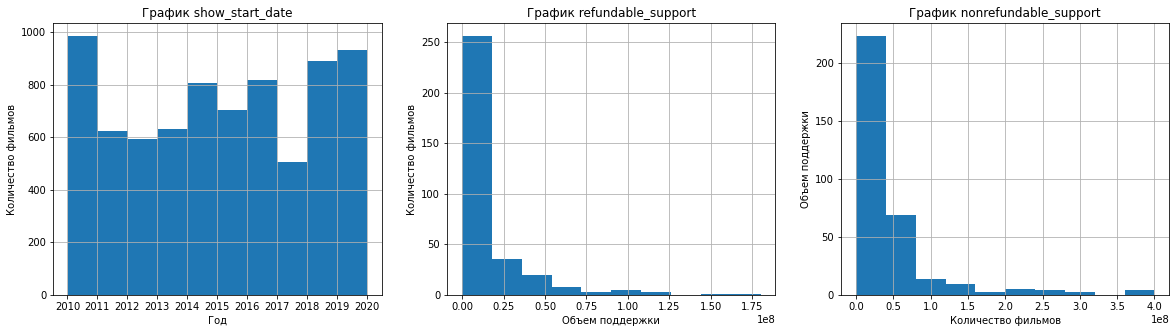

In [33]:
import matplotlib
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (20, 5))
data['show_start_date'].hist(ax=axes[0])
axes[0].set_title('График show_start_date')
axes[0].set_xlabel('Год')
axes[0].set_ylabel('Количество фильмов')
data['refundable_support'].hist(ax=axes[1])
axes[1].set_title('График refundable_support')
axes[1].set_xlabel('Объем поддержки')
axes[1].set_ylabel('Количество фильмов')
data['nonrefundable_support'].hist(ax=axes[2])
axes[2].set_title('График nonrefundable_support')
axes[2].set_xlabel('Количество фильмов')
axes[2].set_ylabel('Объем поддержки')
plt.show()

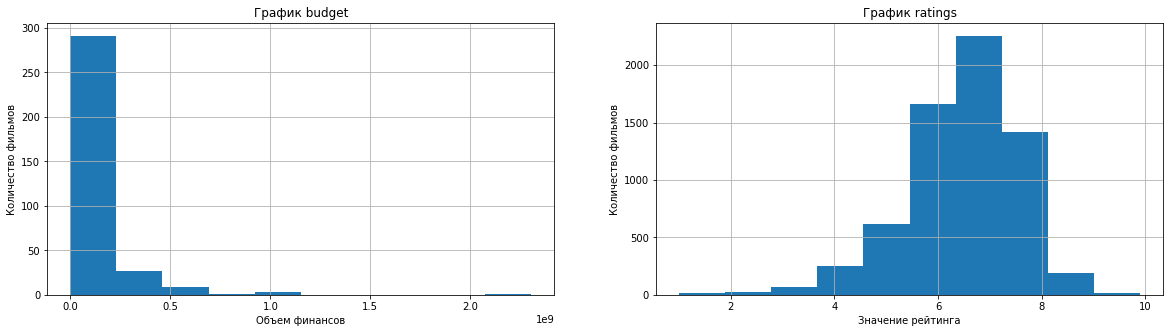

In [34]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (20, 5))
data['budget'].hist(ax=axes[0])
axes[0].set_title('График budget')
axes[0].set_xlabel('Объем финансов')
axes[0].set_ylabel('Количество фильмов')
data['ratings'].hist(ax=axes[1])
axes[1].set_title('График ratings')
axes[1].set_xlabel('Значение рейтинга')
axes[1].set_ylabel('Количество фильмов')
plt.show()

In [35]:
count_data = data[['show_start_date', 'refundable_support', 'nonrefundable_support', 'budget', 'ratings']]
count_data.describe()

,refundable_support,nonrefundable_support,budget,ratings
count,332.00,332.00,332.00,"6,519.00"
mean,"11,864,457.83","48,980,988.89","127,229,716.68",6.49
std,"24,916,555.26","59,980,117.92","188,588,333.12",1.11
min,0.00,0.00,0.00,1.00
25%,0.00,"25,000,000.00","42,000,000.00",5.90
50%,0.00,"30,000,000.00","68,649,916.00",6.60
75%,"15,000,000.00","40,375,000.00","141,985,319.50",7.20
max,"180,000,000.00","400,000,000.00","2,305,074,303.00",9.90


In [36]:
count_data.corr()

,refundable_support,nonrefundable_support,budget,ratings
refundable_support,1.00,0.36,0.64,-0.00
nonrefundable_support,0.36,1.00,0.59,0.13
budget,0.64,0.59,1.00,0.09
ratings,-0.00,0.13,0.09,1.00


In [37]:
data.loc[data['refundable_support'] + data['nonrefundable_support'] >= data['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


In [38]:
data.loc[(data['refundable_support'] > 0) & (data['budget'] == 0), 'refundable_support'] = 0
data.loc[(data['nonrefundable_support'] > 0) & (data['budget'] == 0), 'nonrefundable_support'] = 0
data.loc[data['refundable_support'] + data['nonrefundable_support'] >= data['budget']]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19 12:00:00+00:00,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,0.00,0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26 12:00:00+00:00,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28 12:00:00+00:00,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,0.00,0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21 12:00:00+00:00,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,0.00,0.00,0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08 12:00:00+00:00,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,0.00,0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01 12:00:00+00:00,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29 12:00:00+00:00,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,0.00,0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16 12:00:00+00:00,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,0.00,0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Столбцами с количественными значениями являются следующие столбцы:  
- show_start_date    
- refundable_support    
- nonrefundable_support    
- budget  
- ratings  
Отклоние, медиана и размах в этих столбцах находятся в пределах нормы, как и экстремумы. Из описания столбца budget следует, что он включает в себя сумму значений столбцов refundable_support и nonrefundable_support. Также столбец budget имеет с вышеуказанными столбцами положительную корреляцию.  
В 17 строках обнаружилась ошибка - значение в столбце бюджет было меньше суммы значений в столбцах господдержки. Достоверно указать размер бюджета мы не может, поэтому будет лучше обнулить в таких строках информацию о размере господдержки.

#### Шаг 2.6. Добавим новые столбцы





- Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [39]:
data['show_year'] = data['show_start_date'].dt.year
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015


- Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [40]:
data['main_director'] = data['director'].str.split(',').str[0]
data['main_genre'] = data['genres'].str.split(',').str[0]
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_director,main_genre
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,2015,Тимур Бекмамбетов,фантастика


- Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [41]:
data['support_ratio'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget']
data.tail(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,show_year,main_director,main_genre,support_ratio
7476,Я свободен,111023019,2019-12-26 12:00:00+00:00,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,NaN,2019,И.Северов,драма,0.65
7477,Тридцать,121038419,2019-12-26 12:00:00+00:00,Художественный,Демнехст ауф видео,Германия,Симона Костова,Джейлан Атаман-Джека,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.30,драма,NaN,2019,Симона Костова,драма,NaN
7478,(Не)идеальный мужчина,111023119,2019-12-24 12:00:00+00:00,Художественный,"ООО ""Нон-Стоп Продакшн""",Россия,М.Бальчюнас (псевдоним М.Вайсберг),"С.Мелькумов, А.Роднянский, М.Вайсберг, Р.Минас...",«12+» - для детей старше 12 лет,"40,000,000.00","60,000,000.00","150,147,502.00",Фонд кино,4.50,"комедия,фантастика,мелодрама",NaN,2019,М.Бальчюнас (псевдоним М.Вайсберг),комедия,0.67
7479,Эколав,111023219,2019-12-26 12:00:00+00:00,Художественный,ВГИК,Россия,Д.Григорьев,ВГИК,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Д.Григорьев,NaN,NaN
7480,Акрам Хан: Родом из Карри Хауса,126007919,2019-12-23 12:00:00+00:00,Прочие,Свон Филмз,Великобритания,Ник Пойнц,"Поппи Бегум, Ник Пойнц",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,"219,569.00",2019,Ник Пойнц,NaN,NaN
7481,Сад художника: Американский импрессионизм,126008019,2019-12-23 12:00:00+00:00,Прочие,Севен Артс Продакшнз,Великобритания,Фил Грабски,Фил Грабски,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Фил Грабски,NaN,NaN
7482,Звериная ярость,121037819,2019-12-24 12:00:00+00:00,Художественный,"Дэниел Гродник Продакшнз, Вандерфилм Медиа Кор...",США,Ник Пауэлл,"Джефф Боулер, Дэниэл Гродник, Луильо Руис, Брэ...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.40,"боевик,триллер",NaN,2019,Ник Пауэлл,боевик,NaN
7483,Щенячий патруль: Скорей спешим на помощь!,124010819,2019-12-28 12:00:00+00:00,Художественный,"Никелодеон Анимейшн Студиос, Спин Мастер",США - Канада,Чарльз Е.Бастьен,Дженнифер Додж,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,Чарльз Е.Бастьен,NaN,NaN
7484,"Машины песенки. Серия ""Испанские мотивы""",124010619,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",А.Беляев,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019,А.Беляев,NaN,NaN
7485,"Машины песенки. Серия ""Когда цветут кактусы""",124010719,2019-12-30 12:00:00+00:00,Анимационный,"Анимаккорд Лтд., ООО Студия ""АНИМАККОРД""","Республика Кипр, Россия",И.Трусов,Д.Ловейко,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.30,"комедия,вестерн",NaN,2019,И.Трусов,комедия,NaN


На этапе преобработки данных мы:  
- Проверили типы данных в столбацах и преобразовали их там, где это было необходимо.   
- Изучили пропуски в датафрейме и объяснили, почему заполнили пропуски определенным образом или почему не стали этого делать.   
- Проверили, есть ли в данных дубликаты и описали причины, которые могли повлиять на их появление.  
- Изучили категориальные и количественные значения  
- Добавили в таблицу новые столбцы со следующими названиями и данными:  
show_year - показывает год начала проката фильма  
main_director - показывает имя главного режиссера фильма  
main_genre - показывает основной жанр фильма  
support_ratio - показывает, какую долю от общего бюджета фильма составляет государственная поддержка  

В данных имеются пропуски в следующих столбцах:

film_studio
priduction_country
director
producer
refundable_support
nonrefundable_support
budget
financing_source
ratings
genres
box_office

В столбце film_studio имеются пропуски, т.к. не все фильмы снимаются на студиях. Такие пропуски не являются случайными и заполнять их не нужно.
При рассмотрении строк с пропусками в столбце production_country заметно, что значения можно заполнить, основываясь данных из соседних столбцов, что мы и сделали. Такие пропуски называются полностью случайными.
В столбцах director, ratings и genres пропуски похожи на случайные, однако предложить логичную замену им невозможно. В столбцах rating и genres мы их оставляем, а в столбце director заменим пустой строкой. Этот столбец участвует в дальнейшем анализе, а наличие пропусков будет мешать выполнению операций.
В столбце producer пропуски случайны и не подлежат заполнению, т.к. пропуски имеют фильмы, снятые в СССР. В СССР кинематограф финансировался только государством, продюсеров не было.
Из описания данных следует, что в столбцах refundable_support, nonrefundable_support, budget и financing_source указан объем государственной поддержки. Если в информации о фильме есть пропуски в данных столбцах, значит государственной поддержки он не получал. Пропуски не являются случайными.

### Шаг 3. Проведём исследовательский анализ данных


- Посмотрим, сколько фильмов выходило в прокат каждый год. Данные о прокате в кинотеатрах известны не для всех фильмов. Посчитаем, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируем, как эта доля менялась по годам. Сделаем вывод о том, какой период полнее всего представлен в данных.

In [42]:
data.groupby('show_year')['box_office'].count()

show_year
2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: box_office, dtype: int64

In [43]:
data.groupby('show_year')['box_office'].count().sum()

3158

In [44]:
data['box_office'].notnull().sum() / data.shape[0]

0.42185412770504943

In [45]:
ptable = data.pivot_table(index = 'show_year', values = 'box_office', aggfunc = ['count'])
ptable = ptable.droplevel(0, axis = 1)
ptable.columns = ['Динамика доли с указанной информацией о прокате']
ptable / data.shape[0] * 10

,Динамика доли с указанной информацией о прокате
show_year,
2010,0.14
2011,0.15
2012,0.17
2013,0.25
2014,0.37
2015,0.62
2016,0.70
2017,0.48
2018,0.63


Полнее всего представлена информация о прокате в кинотеатрах в период с 2015 по 2019 год.

- Изучим, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

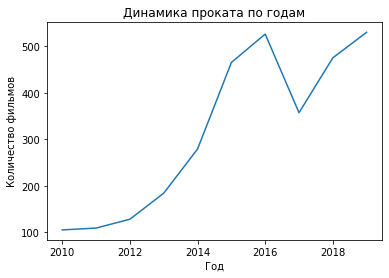

In [46]:
data.groupby('show_year')['box_office'].count().plot(x = 'show_year', y = 'box_office', title = 'Динамика проката по годам', xlabel = 'Год', ylabel = 'Количество фильмов')
plt.show()

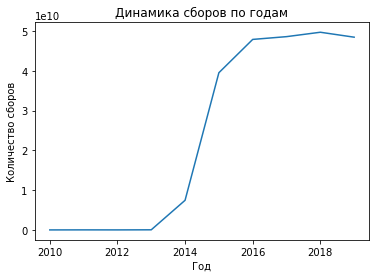

In [47]:
data.groupby('show_year')['box_office'].sum().plot(x = 'show_year', y = 'box_office', title = 'Динамика сборов по годам', xlabel = 'Год', ylabel = 'Количество сборов')
plt.show()

In [48]:
data.groupby('show_year')['box_office'].sum()

show_year
2010           2,428,654.00
2011          14,102,765.00
2012           6,955,423.00
2013          29,799,706.20
2014       7,444,951,859.20
2015      39,497,365,196.40
2016      47,866,299,741.91
2017      48,563,707,217.51
2018      49,668,403,134.32
2019      48,425,708,779.59
Name: box_office, dtype: float64

Минимальной сумма сборов была в 2010 году, а максимальной - в 2018.

- С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [49]:
pivot_table = data.pivot_table(index = 'show_year', values = 'box_office', aggfunc = [('mean', 'median')])
pivot_table = pivot_table.droplevel(1, axis = 1)
pivot_table = pivot_table.droplevel(1, axis = 1)
pivot_table.columns = ['Средняя сумма сборов', 'Медианная сумма сборов']
pivot_table

,Средняя сумма сборов,Медианная сумма сборов
show_year,,
2010,"23,130.04","1,700.00"
2011,"129,383.17","3,000.00"
2012,"54,339.24","5,660.00"
2013,"161,954.92","3,522.50"
2014,"26,684,415.27","18,160.00"
2015,"84,940,570.31","4,920,933.00"
2016,"91,000,569.85","3,846,679.41"
2017,"136,032,793.33","9,968,340.00"
2018,"104,565,059.23","8,891,102.21"


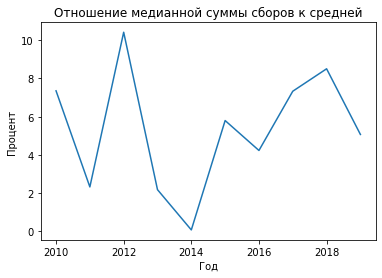

In [50]:
pivot_table['ratio'] = pivot_table['Медианная сумма сборов'] / pivot_table['Средняя сумма сборов'] * 100
pivot_table['ratio'].plot(title = 'Отношение медианной суммы сборов к средней', xlabel = 'Год', ylabel = 'Процент')
plt.show()

In [51]:
pivot_table['ratio'].describe()

count                  10.00
mean                    5.32
std                     3.20
min                     0.07
25%                     2.80
50%                     5.43
75%                     7.34
max                    10.42
Name: ratio, dtype: float64

Минимальная средняя сумма сборов была в 2010 году, а максимальная - в 2017. Минимальной медианная сумма сборов была также в 2010 году, а максимальной - также в 2017. Медианная и средняя сумма сборов сильно отличаются - на 1-2 порядка. Это вызвано тем, что средняя сумма более чувствительная к выбросам и аномально высоким значениям. Медианная сумма сборов составляла максимум 10.5% от средней в 2012 году и минимум 0.07 % в 2014 году.

Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год. Ответим на следующие вопросы:  
- Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? 
- Меняется ли картина в зависимости от года? Если да, с чем это может быть связано.

In [52]:
age_data = data[data['show_year'] >= 2015]
age_data['age_restriction'] = age_data['age_restriction'].str.extract(r'(\d+)', expand=False)
age_ptable = age_data.pivot_table(index = ['show_year', 'age_restriction'], values = 'box_office', aggfunc = ['sum'])
age_ptable = age_ptable.droplevel(0, axis = 1)
age_ptable.groupby('age_restriction').sum().sort_values(by = 'box_office', ascending = False)

/tmp/ipykernel_48/4019866645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_data['age_restriction'] = age_data['age_restriction'].str.extract(r'(\d+)', expand=False)


,box_office
age_restriction,
16,"76,034,733,643.63"
12,"60,619,446,628.33"
6,"55,798,610,799.68"
18,"40,759,615,572.12"
0,"809,077,425.97"


In [53]:
age_ptable.sort_values(by = 'box_office', ascending = False).head(6).sort_values(by = 'show_year', ascending = False)

box_office
show_year age_restriction                     
2019      6                  12,852,548,650.86
2018      16                 16,503,602,346.96
          12                 14,267,291,660.69
2017      16                 18,745,042,900.06
2016      16                 16,664,548,541.74
2015      12                 13,616,082,008.91

По данному разделу проекта можно сделать следующие промежуточные выводы:  

Цели и задачи были следующими:  
- Посмотреть, сколько фильмов выходило в прокат каждый год.   
- Посчитать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.   
- Проанализировать, как эта доля менялась по годам.   
- Сделать вывод о том, какой период полнее всего представлен в данных.  
- Изучить, как менялась динамика проката по годам.  
- Узнать в каком году сумма сборов была минимальной и максимальной.  
- С помощью сводной таблицы посчитать среднюю и медианную сумму сборов для каждого года.   
- Сравнить эти значения и сделать выводы.  
- Определить, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год.  
- Узнать, фильмы с каким возрастным ограничением собрали больше всего денег в прокате и меняется ли картина в зависимости от года  

С 2010 по 2019 год имеются данные о выходе в прокат 3158 фильмов, что составляет 45% от всех фильмов в таблице. Динамика доли фильмов с указанной информацией о прокате на протяжении с 2010 по 2019 годы меняется с 15% до 75%. Полнее всего представлена информация о прокате в кинотеатрах в период с 2015 по 2019 год.

С 2010 по 2012 годы количество фильмов в прокате было минимальным. С 2013 по по 2016 оно резко выросло до максимальных значений. В 2017 году прокат несколько снизился до средне-высокого значения, а с 2018 по 2019 снова достиг максимальных показателей. Сумма сборов была минимальной в 2010 году, а максимальной в 2018.

С 2010 по 2014 годы средняя и медианная сумма сборов находилась в медленном росте с минимальных значений. С 2015 по 2019 годы произошел резкий рост сборов сразу на два порядка.

В области детского кино есть ценз 6+, а следом за ним уже 12+. Между этими возрастами большой разрыв, и не хватает промежуточного рейтинга. Притом что у нас есть два разных рейтинга — 16+ и 18+, хотя разница между шестнадцатилетним и восемнадцатилетним вовсе не столь существенна, как бывает в раннем детском возрасте.
За период с 2015 по 2019 год больше всего фильмов в прокате собрали фильмы с возрастным ограничение категории "16+". В зависимости от года самыми прибыльными были фильмы следующих возрастных категорий:  
- В 2015 году - 12+  
- В 2016 году - 16+  
- В 2017 году - 16+  
- В 2018 году - 16+  
- В 2019 году - 6+  

Возможна связь с демографией - большим количеством рожденных в 2000-2002 гг.  
В области детского кино есть ценз 6+, а следом за ним уже 12+. Между этими возрастами большой разрыв, и  не хватает промежуточного рейтинга. Притом что у нас есть два разных рейтинга — 16+ и 18+, хотя разница между шестнадцатилетним и восемнадцатилетним вовсе не столь существенна, как бывает в раннем детском возрасте.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

Поищем интересные закономерности в данных. Посмотрим, сколько выделяют средств на поддержку кино. Проверим, хорошо ли окупаются такие фильмы, какой у них рейтинг.

In [54]:
budget_data = data[data['refundable_support'].notnull()]
budget_data['total_support'] = budget_data['refundable_support'] + budget_data['nonrefundable_support']
budget_ptable = budget_data.pivot_table(index = 'show_year', values = 'total_support', aggfunc = ['sum'])
budget_ptable

/tmp/ipykernel_48/184049025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_data['total_support'] = budget_data['refundable_support'] + budget_data['nonrefundable_support']


,sum
,total_support
show_year,
2013,"134,347,945.00"
2014,"549,002,299.00"
2015,"3,227,241,459.00"
2016,"3,977,155,482.00"
2017,"3,098,971,662.00"
2018,"3,098,000,000.00"
2019,"4,724,000,000.00"


In [55]:
budget_data['total_support'].sum()

18808718847.0

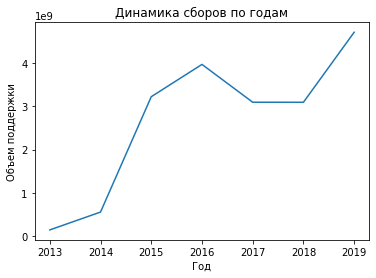

In [56]:
budget_ptable.plot(title = 'Динамика сборов по годам', xlabel = 'Год', ylabel = 'Объем поддержки', legend = False)
plt.show()

In [57]:
payback_data = budget_data[budget_data['box_office'].notnull()]
payback_data['show_result'] = payback_data['box_office'] - payback_data['budget']
payback_data['show_result'].describe()

/tmp/ipykernel_48/2498982373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  payback_data['show_result'] = payback_data['box_office'] - payback_data['budget']


count                 318.00
mean            4,802,960.43
std           319,013,833.07
min        -1,971,477,243.41
25%           -70,061,013.25
50%           -40,108,127.50
75%             2,176,585.58
max         2,913,568,690.79
Name: show_result, dtype: float64

In [58]:
ratings_data = budget_data[budget_data['ratings'].notnull()]
ratings_data['ratings'].describe()

count                 316.00
mean                    6.02
std                     1.15
min                     1.00
25%                     5.30
50%                     6.20
75%                     6.70
max                     9.40
Name: ratings, dtype: float64

На данном этапе у нас были следующие цели и задачи:  
Посмотреть, сколько выделяют средств на поддержку кино.   
Проверить, хорошо ли окупаются такие фильмы, какой у них рейтинг.   

Были получены следующие результаты:
C 2010 по 2012 данные о поддержке кино из бюджета отсутствуют. С 2013 по 2019 год на поддержку кино было выделено свыше 20 миллиардов рублей. Окупаются поддерживаемые из бюджета фильмы плохо, причиняя около 40 миллионов рублей убытков с фильма. Такие фильмы в среднем имеют рейтинг 6,2 из 10.

Из этого можно сделать вывод, что, несмотря на значительное финансирование киноиндустрии со стороны государства, большинство поддерживаемых фильмов не приносят ожидаемой прибыли, а их средний рейтинг указывает на то, что они могут быть недостаточно качественными или популярными. Это может свидетельствовать о необходимости пересмотра стратегии государственной поддержки кино и внедрении более эффективных механизмов финансирования и оценки результатов.  
Переходим к общему выводу.

### Шаг 5. Напишем общий вывод

В ходе исследования был проведен анализ статистики рынка российского кинопроката.  Проведена предобработка данных, включающая в себя:

1) Удаление пропусков путем заполнения их подходящими значениями.

2) Изменение типов данных.

3) Обработку дубликатов.

В данных имеются пропуски в следующих столбцах:  

film_studio  
priduction_country  
director  
producer  
refundable_support  
nonrefundable_support  
budget  
financing_source  
ratings  
genres  
box_office  

В столбце film_studio имеются пропуски, т.к. не все фильмы снимаются на студиях. Такие пропуски не являются случайными и заполнять их не нужно.  
При рассмотрении строк с пропусками в столбце production_country заметно, что значения можно заполнить, основываясь данных из соседних столбцов, что мы и сделали. Такие пропуски называются полностью случайными.  
В столбцах director, ratings и genres пропуски похожи на случайные, однако предложить логичную замену им невозможно. В столбцах rating и genres мы их оставляем, а в столбце director заменим пустой строкой. Этот столбец участвует в дальнейшем анализе, а наличие пропусков будет мешать выполнению операций.  
В столбце producer пропуски случайны и не подлежат заполнению, т.к. пропуски имеют фильмы, снятые в СССР. В СССР кинематограф финансировался только государством, продюсеров не было.  
Из описания данных следует, что в столбцах refundable_support, nonrefundable_support, budget и financing_source указан объем государственной поддержки. Если в информации о фильме есть пропуски в данных столбцах, значит государственной поддержки он не получал. Пропуски не являются случайными.   

Почти во всех категориальных столбцах в одной ячейке идет перечисление субъектов.  

В 17 строках обнаружилась ошибка - значение в столбце бюджет было меньше суммы значений в столбцах господдержки. Достоверно указать размер бюджета мы не может, поэтому будет лучше обнулить в таких строках информацию о размере господдержки.  


Добавлены в таблицу новые столбцы со следующими названиями и данными:  
- show_year - показывает год начала проката фильма  
- main_director - показывает имя главного режиссера фильма  
- main_genre - показывает основной жанр фильма  
- support_ratio - показывает, какую долю от общего бюджета фильма составляет государственная поддержка 

Выявлены следующие зависимости:
С 2010 по 2019 год имеются данные о выходе в прокат 3158 фильмов, что составляет 45% от всех фильмов в таблице. Динамика доли фильмов с указанной информацией о прокате на протяжении с 2010 по 2019 годы меняется с 15% до 75%. Полнее всего представлена информация о прокате в кинотеатрах в период с 2015 по 2019 год.  

С 2010 по 2012 годы количество фильмов в прокате было минимальным. С 2013 по по 2016 оно резко выросло до максимальных значений. В 2017 году прокат несколько снизился до средне-высокого значения, а с 2018 по 2019 снова достиг максимальных показателей.  Сумма сборов была минимальной в 2010 году, а максимальной в 2018.  

С 2010 по 2014 годы средняя и медианная сумма сборов находилась в медленном росте с минимальных значений. С 2015 по 2019 годы произошел резкий рост сборов сразу на два порядка. Минимальная средняя сумма сборов была в 2010 году, а максимальная - в 2017. Минимальной медианная сумма сборов была также в 2010 году, а максимальной - также в 2017. Медианная и средняя сумма сборов сильно отличаются - на 1-2 порядка. Это вызвано тем, что средняя сумма более чувствительная к выбросам и аномально высоким значениям. Медианная сумма сборов составляла максимум 10.5% от средней в 2012 году и минимум 0.07 % в 2014 году.  

За период с 2015 по 2019 год больше всего фильмов в прокате собрали фильмы с возрастным ограничение категории "16+". В зависимости от года самыми прибыльными были фильмы следующих возрастных категорий:  

- В 2015 году - 12+  
- В 2016 году - 16+  
- В 2017 году - 16+  
- В 2018 году - 16+  
- В 2019 году - 6+  

Возможна связь с демографией - большим количеством рожденных в 2000-2002 гг.  
В области детского кино есть ценз 6+, а следом за ним уже 12+. Между этими возрастами большой разрыв, и не хватает промежуточного рейтинга. Притом что у нас есть два разных рейтинга — 16+ и 18+, хотя разница между шестнадцатилетним и восемнадцатилетним вовсе не столь существенна, как бывает в раннем детском возрасте.  

C 2010 по 2012 данные о поддержке кино из бюджета отсутствуют. С 2013 по 2019 год на поддержку кино было выделено свыше 20 миллиардов рублей. Окупаются поддерживаемые из бюджета фильмы плохо, причиняя около 40 миллионов рублей убытков с каждого фильма. Такие фильмы в среднем имеют рейтинг 6,2 из 10.  
Из этого можно сделать вывод, что, несмотря на значительное финансирование киноиндустрии со стороны государства, большинство поддерживаемых фильмов не приносят ожидаемой прибыли, а их средний рейтинг указывает на то, что они могут быть недостаточно качественными или популярными. 


В качестве рекомендаций можно предложить:

- Обратить внимание на подростковое кино, как стабильно популярный у зрителя жанр  

- Совершенствовать систему отбора фильмов для государственной поддержки  

- Совершенствовать систему, формирующую данные для предотвращения пропусков в данных  

- Добавить больше категорий в систему возрастных ограничений  

- Решения, принятые для поддержки кино в период с 2015 по 2019 годы оказались эффективными, их лучше развивать.  

- Рассмотреть возможность пересмотра стратегии государственной поддержки кино и внедрении более эффективных механизмов финансирования и оценки результатов.

- Исследовать другие признаки, рассчитывать другие метрики